<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Module-config.py" data-toc-modified-id="Module-config.py-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Module <code>config.py</code></a></span></li><li><span><a href="#Modules-data.py-and-plot.py" data-toc-modified-id="Modules-data.py-and-plot.py-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modules <code>data.py</code> and <code>plot.py</code></a></span></li></ul></div>

# Show the disaggregator overview

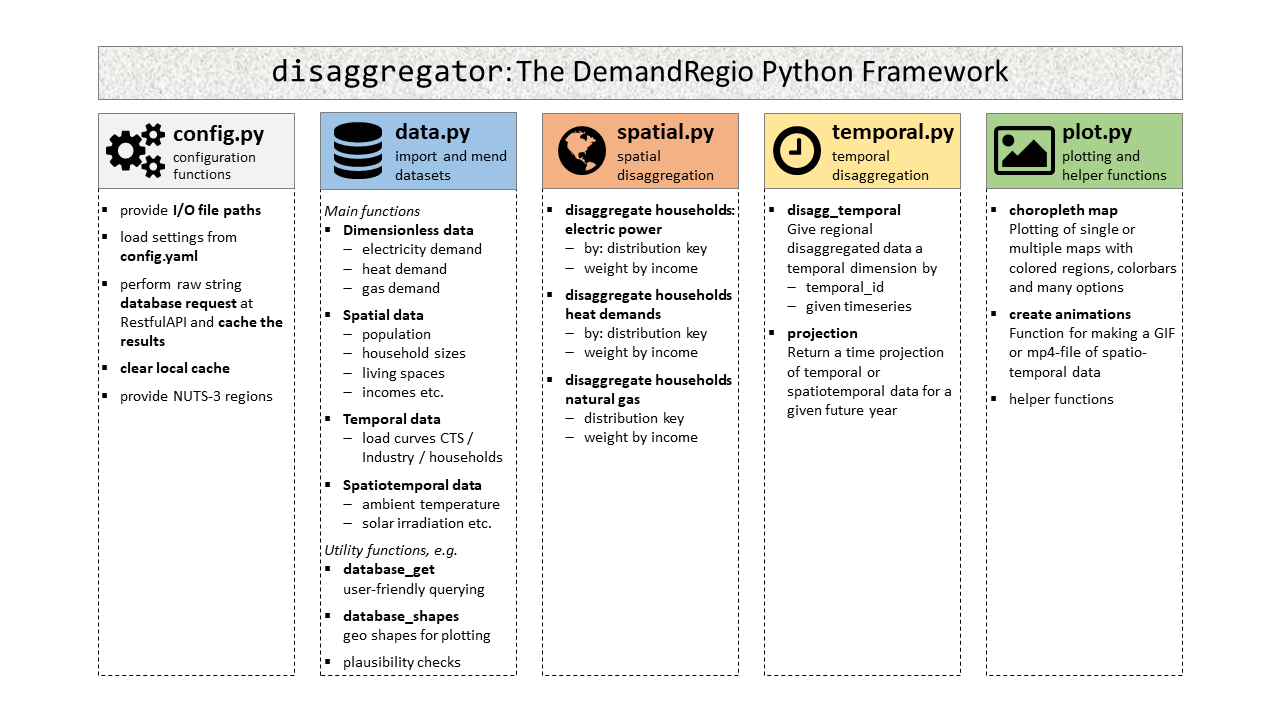

In [1]:
from IPython.display import Image

pic = Image(filename=("./img/overview.png"))
pic

# Introduction

## Module `config.py`

The `config.py`-module is resonsible for all configuration needs of the entire program. This encompasses tasks such as, but not limited to:
- making I/O paths available,
- processing the contents of the `config.yaml`-file,
- establishing a connection to the demandregio database through a RESTful-API and
- providing data assignments based on dictionaries.

In [2]:
from disaggregator import config

Load config from the ``config.yaml``-file and get a value from a key, e.g.:

In [3]:
cfg = config.get_config()
cfg["database_host"]

'https://api.opendata.ffe.de/demandregio/'

A typical example for assignments are those between the NUTS-3-code and its real-world name of the 401 regions in Germany. These can be accessed through:

In [4]:
dict_nuts3_name = config.dict_region_code(keys="natcode_nuts3", values="name")
dict_nuts3_name

2025-09-25 14:08:41 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


{'DE915': 'Göttingen',
 'DE919': 'Osterode am Harz',
 'DEF01': 'Flensburg, Kreisfreie Stadt',
 'DEF02': 'Kiel, Kreisfreie Stadt',
 'DEF03': 'Lübeck, Kreisfreie Stadt',
 'DEF04': 'Neumünster, Kreisfreie Stadt',
 'DEF05': 'Dithmarschen',
 'DEF06': 'Herzogtum Lauenburg',
 'DE278': 'Günzburg',
 'DEF07': 'Nordfriesland',
 'DEF08': 'Ostholstein',
 'DEF09': 'Pinneberg',
 'DEF0A': 'Plön',
 'DEF0B': 'Rendsburg-Eckernförde',
 'DEF0C': 'Schleswig-Flensburg',
 'DEF0D': 'Segeberg',
 'DEF0E': 'Steinburg',
 'DEF0F': 'Stormarn',
 'DE600': 'Hamburg',
 'DE911': 'Braunschweig, Kreisfreie Stadt',
 'DE912': 'Salzgitter, Kreisfreie Stadt',
 'DE913': 'Wolfsburg, Kreisfreie Stadt',
 'DE914': 'Gifhorn',
 'DE916': 'Goslar',
 'DE917': 'Helmstedt',
 'DE918': 'Northeim',
 'DE91A': 'Peine',
 'DE91B': 'Wolfenbüttel',
 'DE91C': 'Göttingen',
 'DE929': 'Region Hannover',
 'DE922': 'Diepholz',
 'DE923': 'Hameln-Pyrmont',
 'DE925': 'Hildesheim',
 'DE926': 'Holzminden',
 'DE927': 'Nienburg (Weser)',
 'DE928': 'Schaumburg'

## Modules `data.py` and `plot.py`

The `data.py`-module is resposible for providing 
- all relevant datasets (dimensionless, spatial, temporal and spatiotemporal) in a clear and structured manner,
- access the demandregio-database in a comfortable way and
- some handy utility functions.

The `plot.py`-module provides plotting functions such as
- spatial data: geographical choropleth maps
- temporal data: multidimensional line/bar/scatter charts
- spatiotemporal data: animations.

In [12]:
from disaggregator import data, plot
import json

The demandregio database contains both **spatial** and **temporal** datasets.

(**NOTE**: under *tables_descriptions/* directory I created files containing the descriptions for the tables. There you find, e.g., *temporal_descriptions.json* which contain all the fetched data description, and *temporal_simple_description.json*, which contains only the title and description of the table. In *tables_descriptions.py* you can see how the descriptions were fetched and how to load them. You can also check the api at the end of the page on https://opendata.ffe.de/how-to/)

To have a look, what different **spatial datasets** are available, we do:

In [15]:
table_id = 1
spatial_desc = data.description_data(id=table_id, dimension="spatial", max_retries=3)
# spatial_desc
print(json.dumps(spatial_desc, indent=4, ensure_ascii=False))

2025-09-25 14:12:22 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial_description?id_spatial=1 (attempt 1/4)
{
    "id_spatial": 1,
    "title": "Einwohnerzahl, 1997..2017",
    "oep_metadata": {
        "name": "id_spatial=1",
        "title": "Population Statistics (German Districts)",
        "review": null,
        "context": {
            "contact": "https://www.ffe.de/die-ffe/die-personen/mitarbeiter-ffe/25",
            "grantNo": "03ET4040B",
            "homepage": "https://www.ffe.de/themen-und-methoden/erzeugung-und-markt/735",
            "sourceCode": null,
            "documentation": "http://opendata.ffe.de/dataset/population-statistics/",
            "fundingAgency": "Bundesministerium für Wirtschaft und Energie",
            "publisherLogo": "https://www.ffe.de/templates/ffe_v3/img/ffe_logo_2019.png",
            "fundingAgencyLogo": "http://opendata.ffe.de/wp-content/uploads/2019/09/titel_foerderlogo_bmwi.jpg

... and for **temporal datasets** we do:

In [16]:
table_id = 1
temporal_desc = data.description_data(id=table_id, dimension="temporal", max_retries=3)
# temporal_desc
print(json.dumps(temporal_desc, indent=4, ensure_ascii=False))

2025-09-25 14:14:07 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_temporal_description?id_temporal=1 (attempt 1/4)
{
    "id_temporal": 1,
    "title": "Wochentag, 1995..2060",
    "oep_metadata": {
        "name": "id_temporal=1",
        "title": [
            "Wochentage im Jahr in stündlicher Auflösung.",
            "Weekdays in the Year in Hourly Resolution."
        ],
        "description": [
            "Wochentage im Jahr (Montag=1..Sonntag=7 => isodow) in stündlicher Auflösung.",
            "Weekdays in the year (Monday=1..Sunday=7 => isodow) in hourly resolution."
        ],
        "language": [
            "en-GB",
            "en-US",
            "de-DE"
        ],
        "keywords": null,
        "publicationDate": "2019-11-12",
        "context": {
            "homepage": "https://www.ffe.de/themen-und-methoden/erzeugung-und-markt/735",
            "documentation": "https://www.ffe.de/themen-und-methoden/erzeugu

To have a quick look at all avaiable tables for temporal as of 25.09.2025.

In [20]:
with open("./tables_descriptions/temporal_simple_description.json", "r", encoding="utf-8") as f:
    temporal_tables = json.load(f)
print(json.dumps(temporal_tables, indent=4, ensure_ascii=False))

{
    "1": {
        "title": [
            "Wochentage im Jahr in stündlicher Auflösung.",
            "Weekdays in the Year in Hourly Resolution."
        ],
        "description": [
            "Wochentage im Jahr (Montag=1..Sonntag=7 => isodow) in stündlicher Auflösung.",
            "Weekdays in the year (Monday=1..Sunday=7 => isodow) in hourly resolution."
        ]
    },
    "2": {
        "title": [
            "Meteorologische Jahreszeiten in stündlicher Auflösung",
            "Meteorological Seasons in Hourly Resolution"
        ],
        "description": [
            "Meteorologische Jahreszeiten (Dez-Feb: 1, Mrz-Mai: 2, Jun-Aug: 3, Sep-Nov: 4) in stündlicher Auflösung",
            "Meteorological seasons (Dec-Feb: 1, March-May: 2, Jun-Aug: 3, Sep-Nov: 4) in hourly resolution"
        ]
    },
    "3": {
        "title": [
            "Stunde des Tages",
            "Hour of the day"
        ],
        "description": [
            "Stunde des Tages (mit Zeitumstellung).",

Load **population** per region. This dataset is one-dimensional and returned as a ``pandas.Series`` see here:

In [9]:
df_pop = data.population()
df_pop.head()

2025-09-25 13:38:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 13:38:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


nuts3
DE111    623738.0
DE112    381281.0
DE113    524127.0
DE114    252749.0
DE115    534074.0
Name: value, dtype: float64

Load **household sizes** per region. This dataset is two-dimensional and returned as a ``pandas.DataFrame`` see here:

In [10]:
# The table_id=14 (Number of households by household size) has the '6' column but it only has data for the year 2011.
# The table_id=41 (Population Forecast 2030 - Number of Households by Household Size) has data for different years but does not provide the '6' column, where column '5' is households with more than 4 persons.
# WARNING: the data from table 14 and 41 do not match for the year 2011.
# QUESTION: which table to use? Probably table 41.
df_HH = data.households_per_size(table_id=14, year=2011)
df_HH.head()

2025-09-25 13:38:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 13:38:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 13:38:08 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


hh_size         1        2        3        4       5       6
nuts3                                                       
DE111    128790.0  86757.0  35460.0  25968.0  8891.0  4381.0
DE112     52484.0  51906.0  24381.0  21584.0  6891.0  2905.0
DE113     78944.0  74585.0  33377.0  28722.0  8657.0  3612.0
DE114     34386.0  35443.0  16924.0  14549.0  4639.0  1991.0
DE115     77832.0  77216.0  32540.0  28915.0  8639.0  3626.0

So single-households are in column ``1``, households /w two persons are in column ``2`` and so on...    
***Please note***: Column ``6`` contains all household sizes with more than five persons.

Now, it could happen that you think that the values in one region are somewhat remarkable or special (very high, very low, variating in size...) in contrast to the surroung regions, e.g.:

In [11]:
df_HH.loc["DE27D":"DE402"]

hh_size         1         2         3         4        5        6
nuts3                                                            
DE27D     14937.0   15376.0    8858.0    8341.0   3181.0   1347.0
DE27E     25708.0   23921.0    9779.0    8814.0   3017.0   1254.0
DE300    881613.0  555758.0  198155.0  108215.0  33104.0  18091.0
DE401     16161.0   14631.0    4969.0    2118.0    468.0    198.0
DE402     23843.0   19315.0    6807.0    2893.0    651.0    281.0

As you can see region with nuts3-ID `DE300` is a lot higher than the two around. For this case, it is useful to quickly get to know the name of that regions for a better unterstanding. This can be done easily with the function `append_region_name(df)`:

In [12]:
data.append_region_name(df_HH.loc["DE27D":"DE402"])

2025-09-25 13:38:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


hh_size         1         2         3         4        5        6  \
nuts3                                                               
DE27D     14937.0   15376.0    8858.0    8341.0   3181.0   1347.0   
DE27E     25708.0   23921.0    9779.0    8814.0   3017.0   1254.0   
DE300    881613.0  555758.0  198155.0  108215.0  33104.0  18091.0   
DE401     16161.0   14631.0    4969.0    2118.0    468.0    198.0   
DE402     23843.0   19315.0    6807.0    2893.0    651.0    281.0   

hh_size                                 region_name  
nuts3                                                
DE27D                                    Donau-Ries  
DE27E                                    Oberallgäu  
DE300                                        Berlin  
DE401    Brandenburg an der Havel, Kreisfreie Stadt  
DE402                     Cottbus, Kreisfreie Stadt

Or, a bit more elegant and pythonic, just like this:

In [13]:
df_HH.loc["DE27D":"DE402"].pipe(data.append_region_name)

2025-09-25 13:38:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


hh_size         1         2         3         4        5        6  \
nuts3                                                               
DE27D     14937.0   15376.0    8858.0    8341.0   3181.0   1347.0   
DE27E     25708.0   23921.0    9779.0    8814.0   3017.0   1254.0   
DE300    881613.0  555758.0  198155.0  108215.0  33104.0  18091.0   
DE401     16161.0   14631.0    4969.0    2118.0    468.0    198.0   
DE402     23843.0   19315.0    6807.0    2893.0    651.0    281.0   

hh_size                                 region_name  
nuts3                                                
DE27D                                    Donau-Ries  
DE27E                                    Oberallgäu  
DE300                                        Berlin  
DE401    Brandenburg an der Havel, Kreisfreie Stadt  
DE402                     Cottbus, Kreisfreie Stadt

So after this step it becomes clear, why these region's values are that high: It is simply Berlin, the biggest city.

One further important dataset is that containing the **living spaces in [m²]** by _building type_ for each region.
building types:
- `1FH`: one family house
- `2FH`: two family house
- `MFH_03_06`: multi family house for 3-6 families
- `MFH_07_12`: multi family house for 7-12 families
- `MFH_13_99`: multi family house for >12 families

In [14]:
df_ls = data.living_space()
df_ls.head()

2025-09-25 13:38:08 disaggregator.data: INFO     Using living space data for year 2018.
2025-09-25 13:38:08 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=12&year=2018 (attempt 1/6)


2025-09-25 13:38:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 13:38:25 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 13:38:25 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


building_type           1FH           2FH     MFH_03_06     MFH_07_12  \
nuts3                                                                   
DE111          3.403625e+06  2.081553e+06  7.937328e+06  6.709143e+06   
DE112          6.197582e+06  3.432353e+06  3.655280e+06  2.423038e+06   
DE113          8.000477e+06  4.431818e+06  6.000478e+06  3.206198e+06   
DE114          4.434813e+06  2.800774e+06  2.425602e+06  1.101553e+06   
DE115          8.145413e+06  4.317894e+06  5.876111e+06  3.531068e+06   

building_type     MFH_13_99  
nuts3                        
DE111          3.507993e+06  
DE112          1.543025e+06  
DE113          1.481549e+06  
DE114          4.909947e+05  
DE115          1.632806e+06

Now let's plot these datasets as a choropleth map:

2025-09-25 13:38:25 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:25 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:25 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


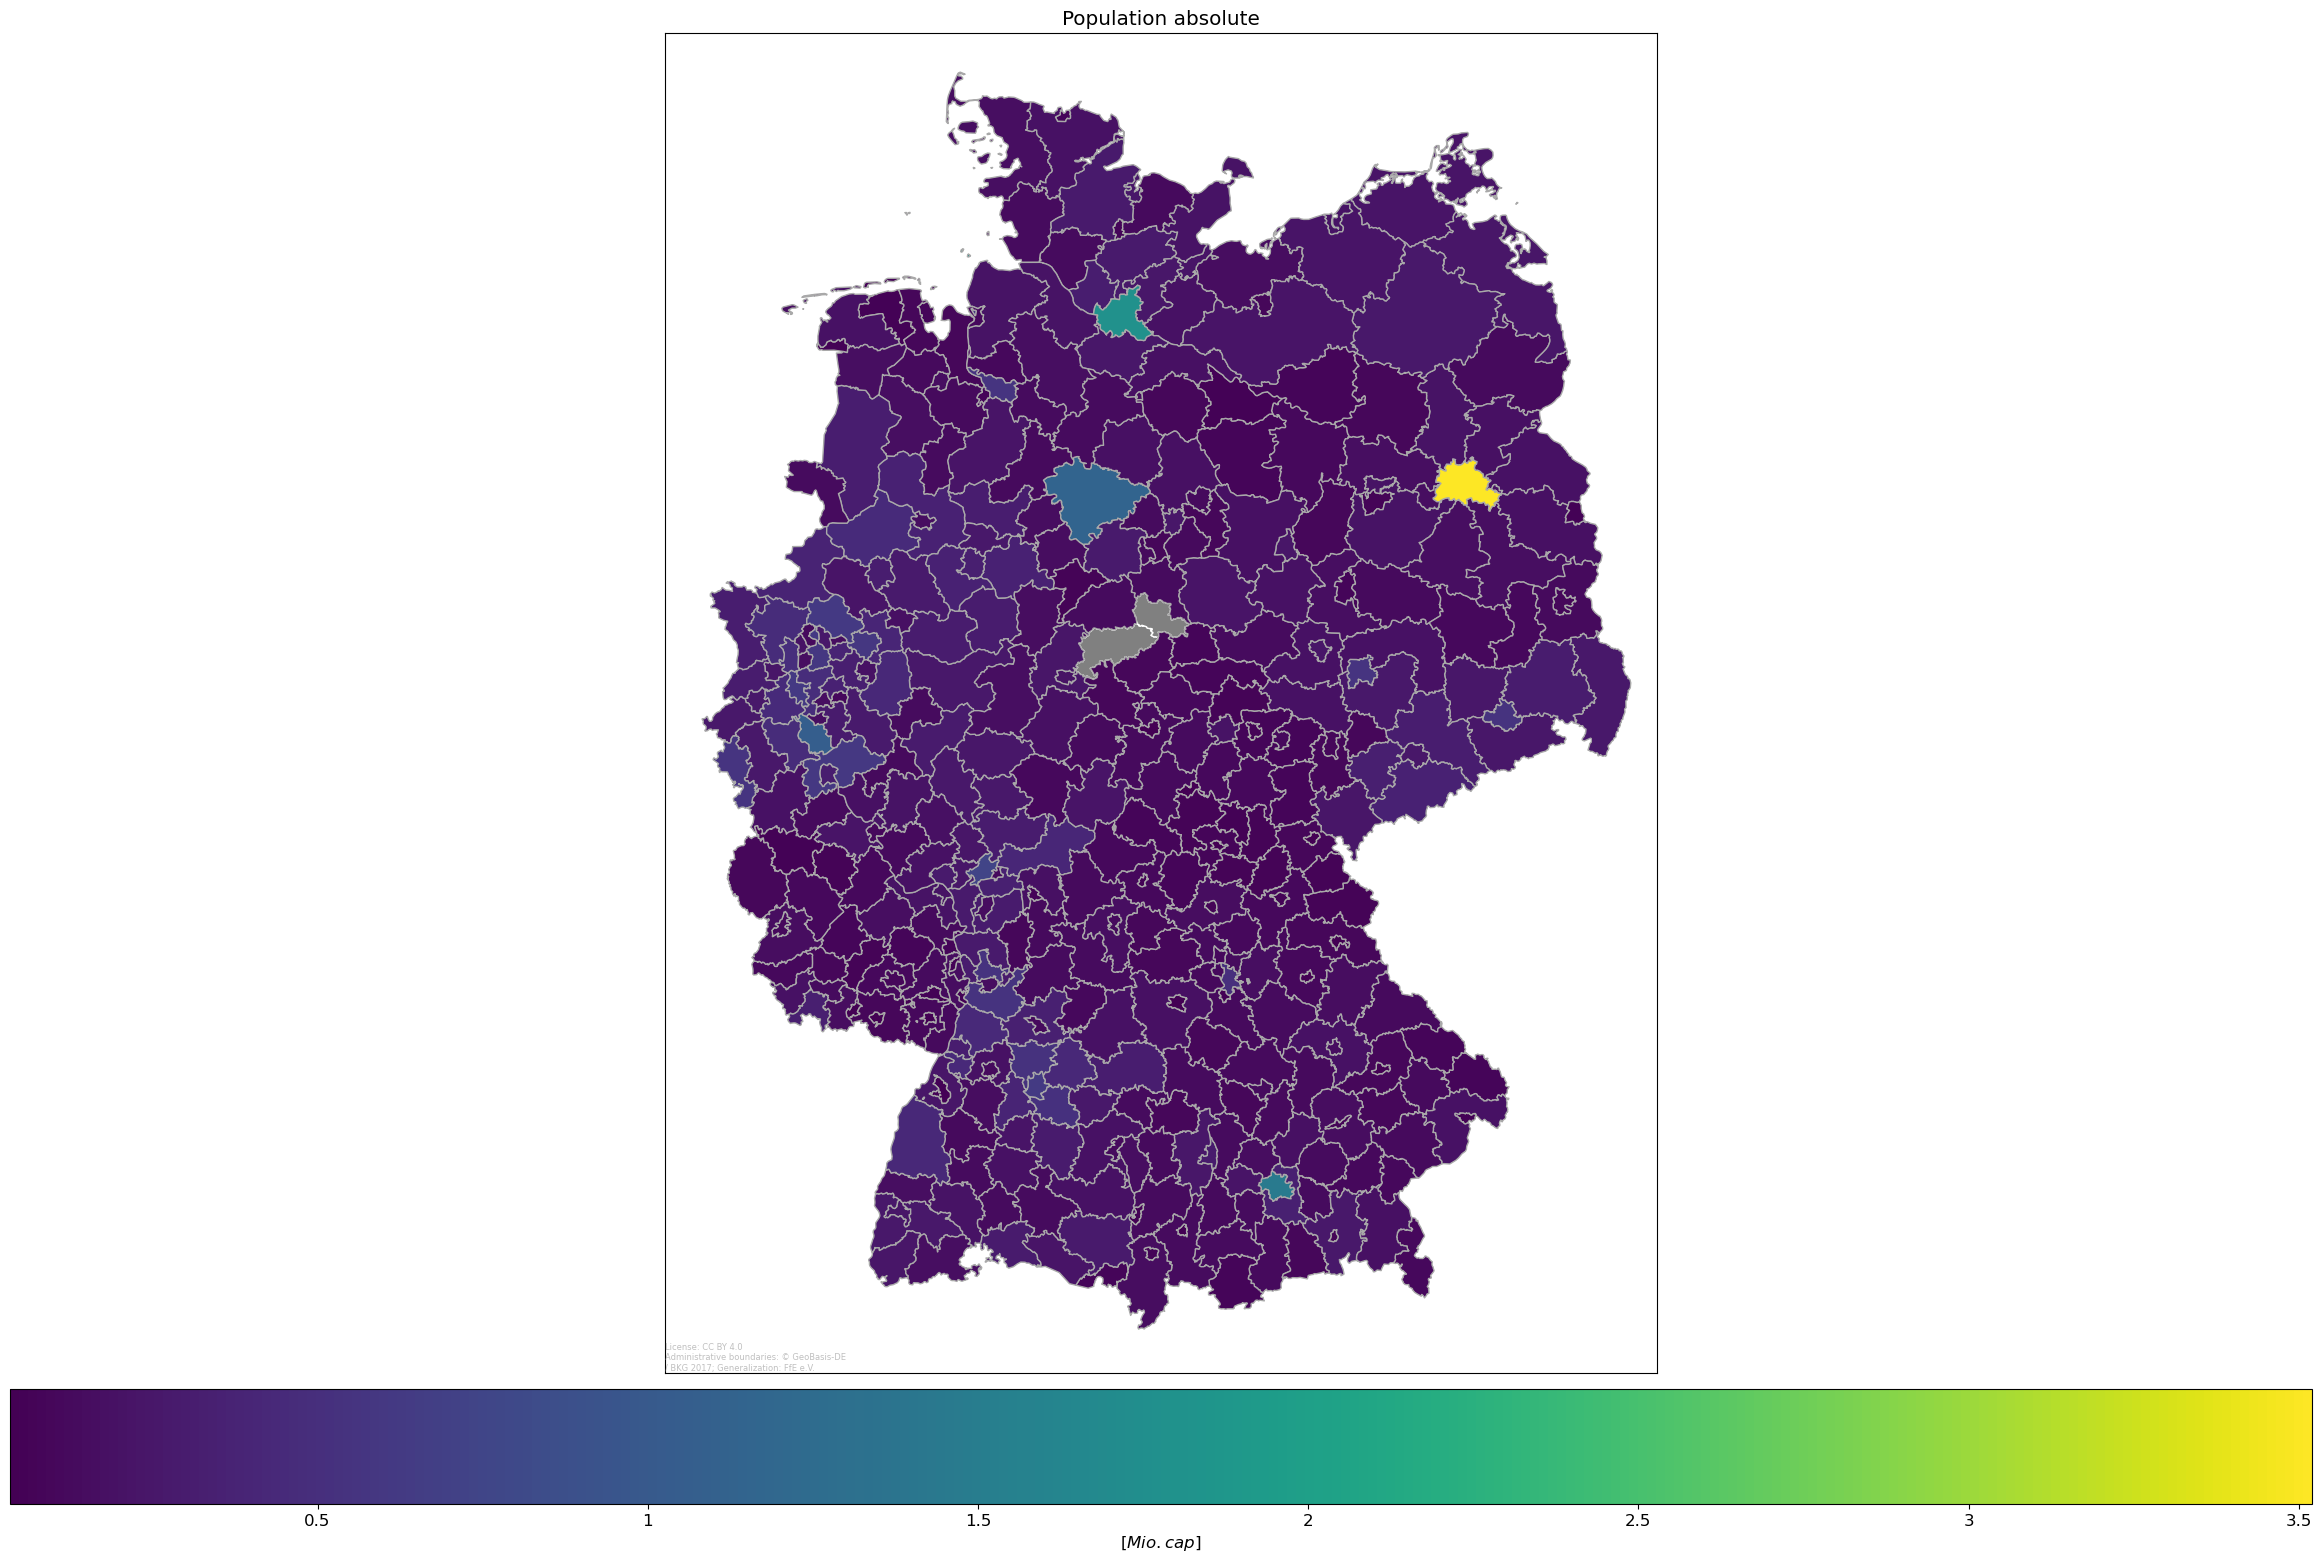

In [15]:
fig, ax = plot.choropleth_map(
    df_pop / 1e6,
    relative=False,
    unit="Mio. cap",
    axtitle="Population absolute",
    shape_source_api=False,
)

As you can see, this is an <u>absolute</u> illustration, as it just shows the number of persons living in each region.  
  
Though this might be the most intuitive way, it contains **two severe problems**:  
1. Since the population in the biggest city (Berlin) is almost *twice as big* as in the second-largest city of Hamburg and more than 3 times bigger as in the fourth-largest city (Cologne), but most of the rural areas have **way less** residents, the colorbar scaling does not provide good information.  


2. The illustration does not take into account the size of the different regions. So, even if $-$ theoretically $-$ all people would be distributed equally over Germany, bigger regions would always show more residents than smaller ones.  
  
The **solution** is a <u>relative</u> illustration, showing the population per region as a proportion of the underlying area size in square-kilometers:

2025-09-25 13:38:26 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:26 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:26 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


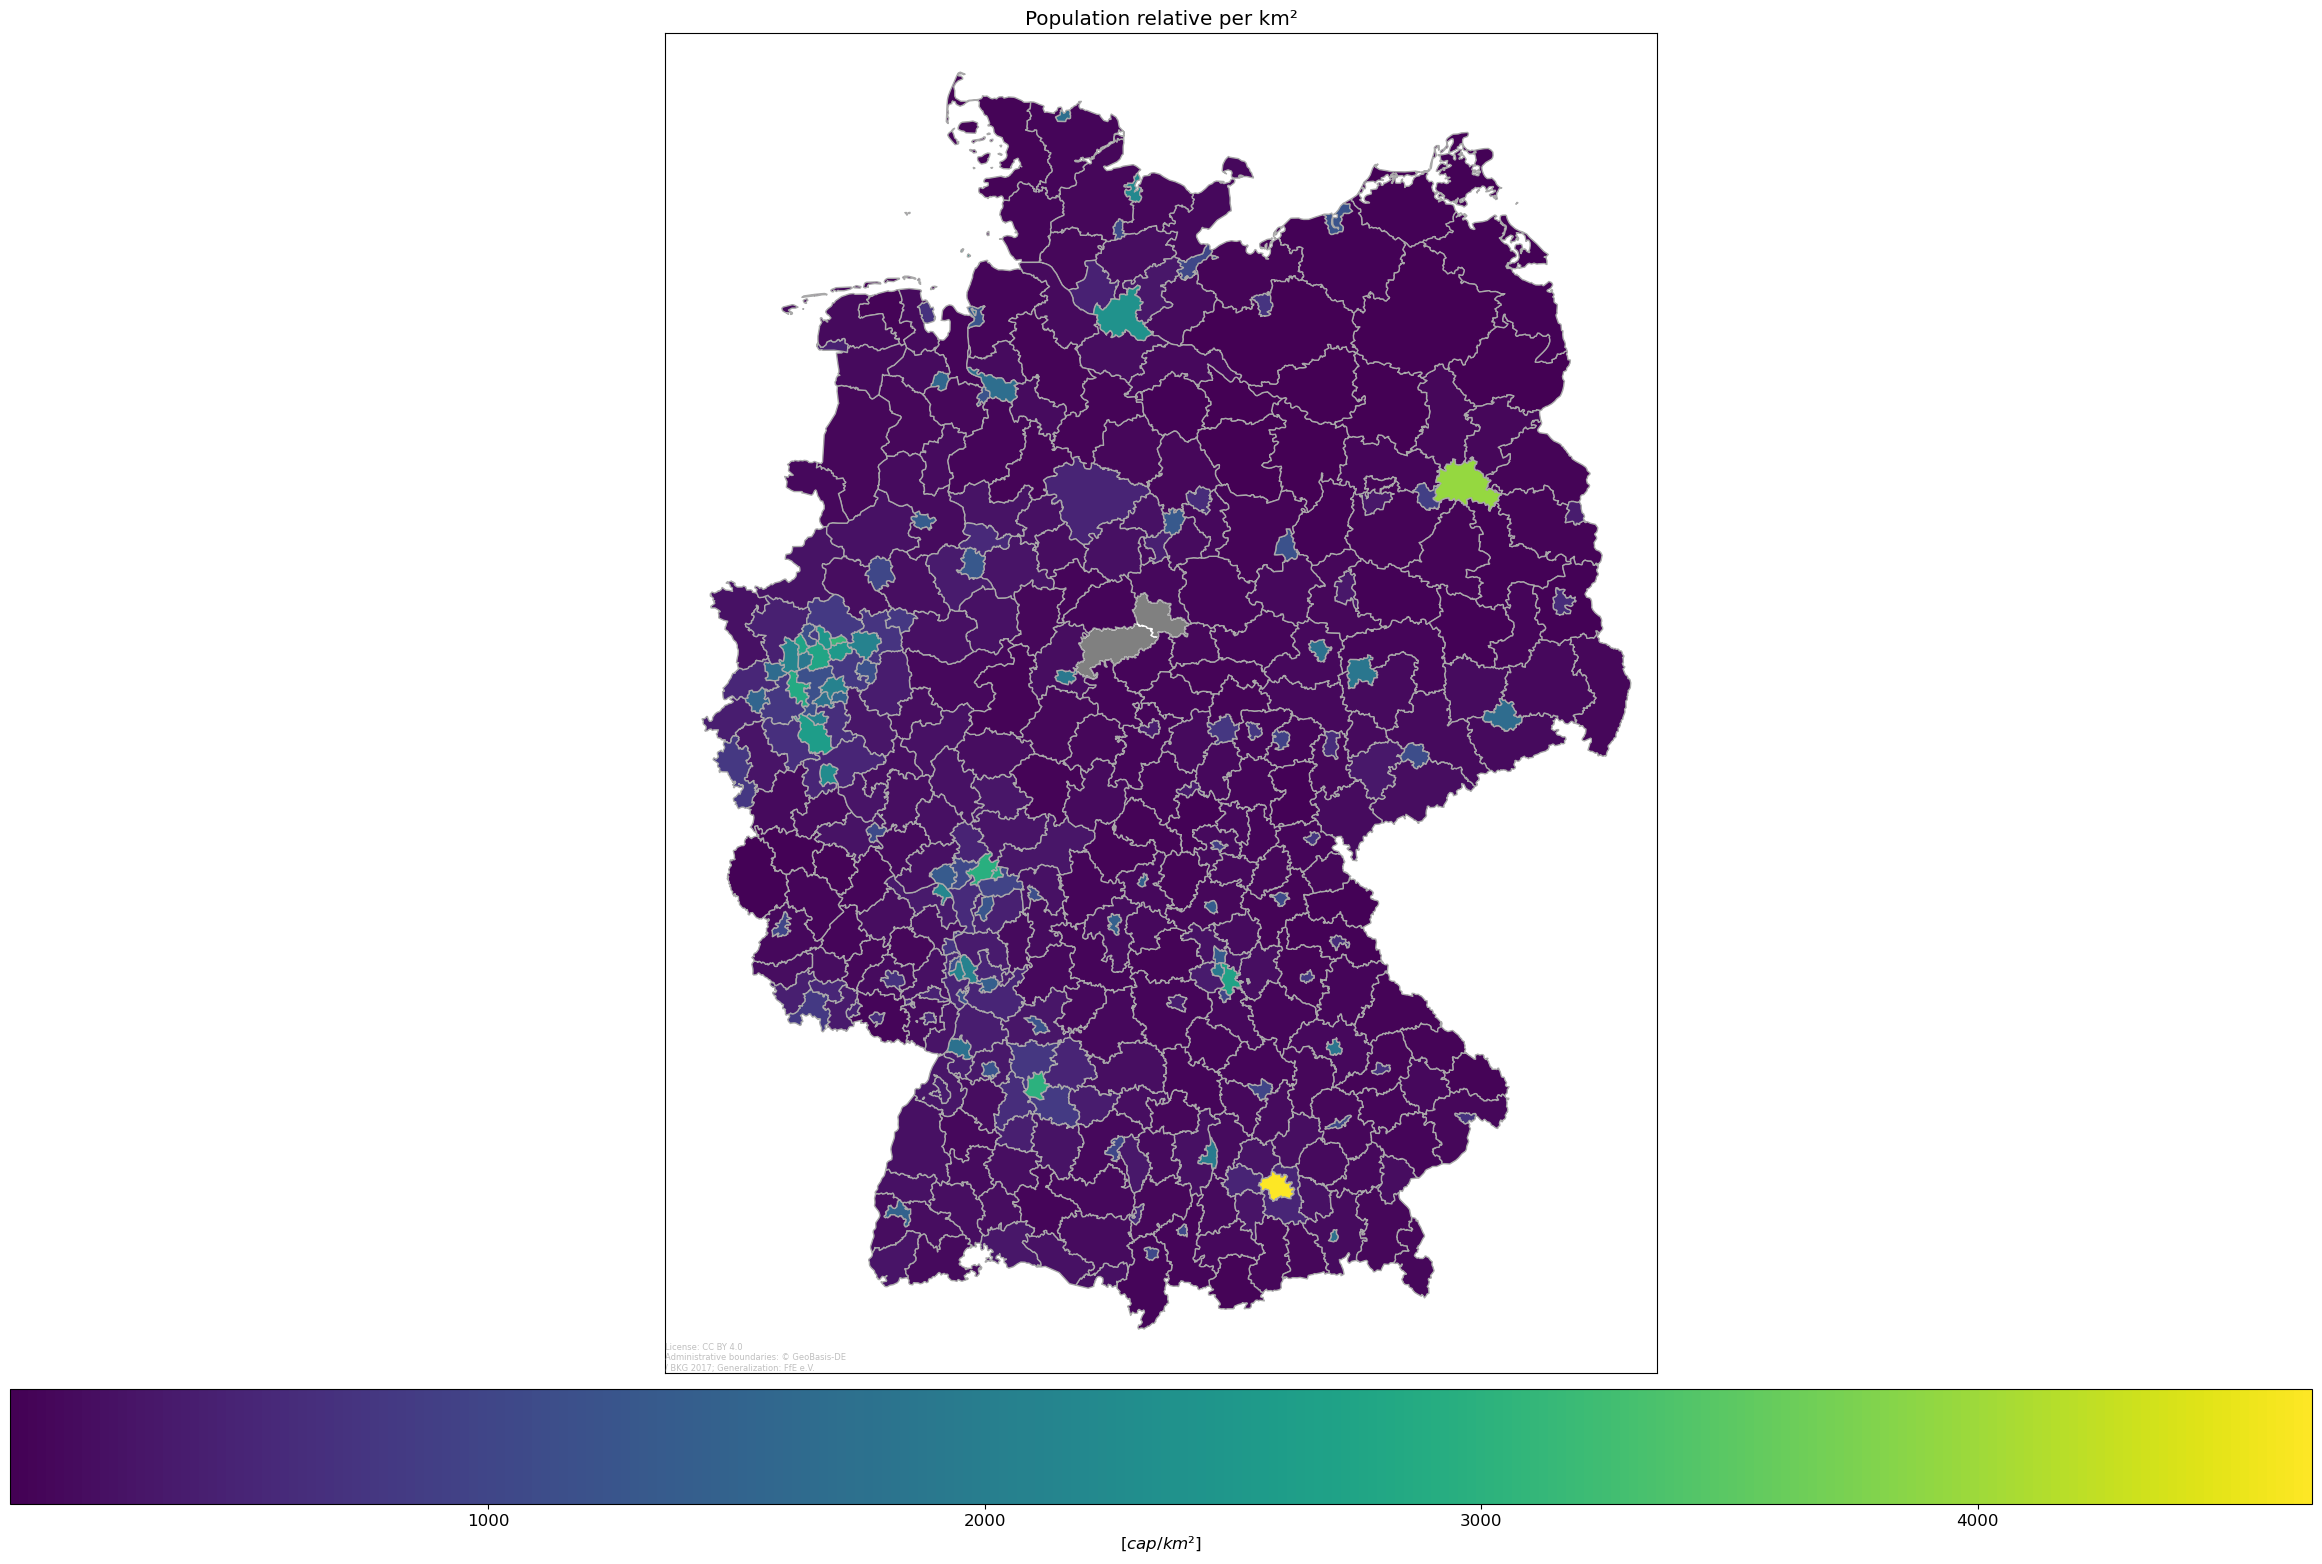

In [16]:
fig, ax = plot.choropleth_map(
    df_pop,
    relative=True,
    unit="cap",
    axtitle="Population relative per km²",
    shape_source_api=False,
)

Now, this graphic shows a lot better, which areas are more densely and which are less densely populated.  

However, the two largest cities (Berlin and Munich) with ~4000+ residents/km² still kind of stick out. If we want to learn, where other densely populated areas are, it might be helpful to limit the colorization interval from zero to 3000:

2025-09-25 13:38:27 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:27 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:27 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


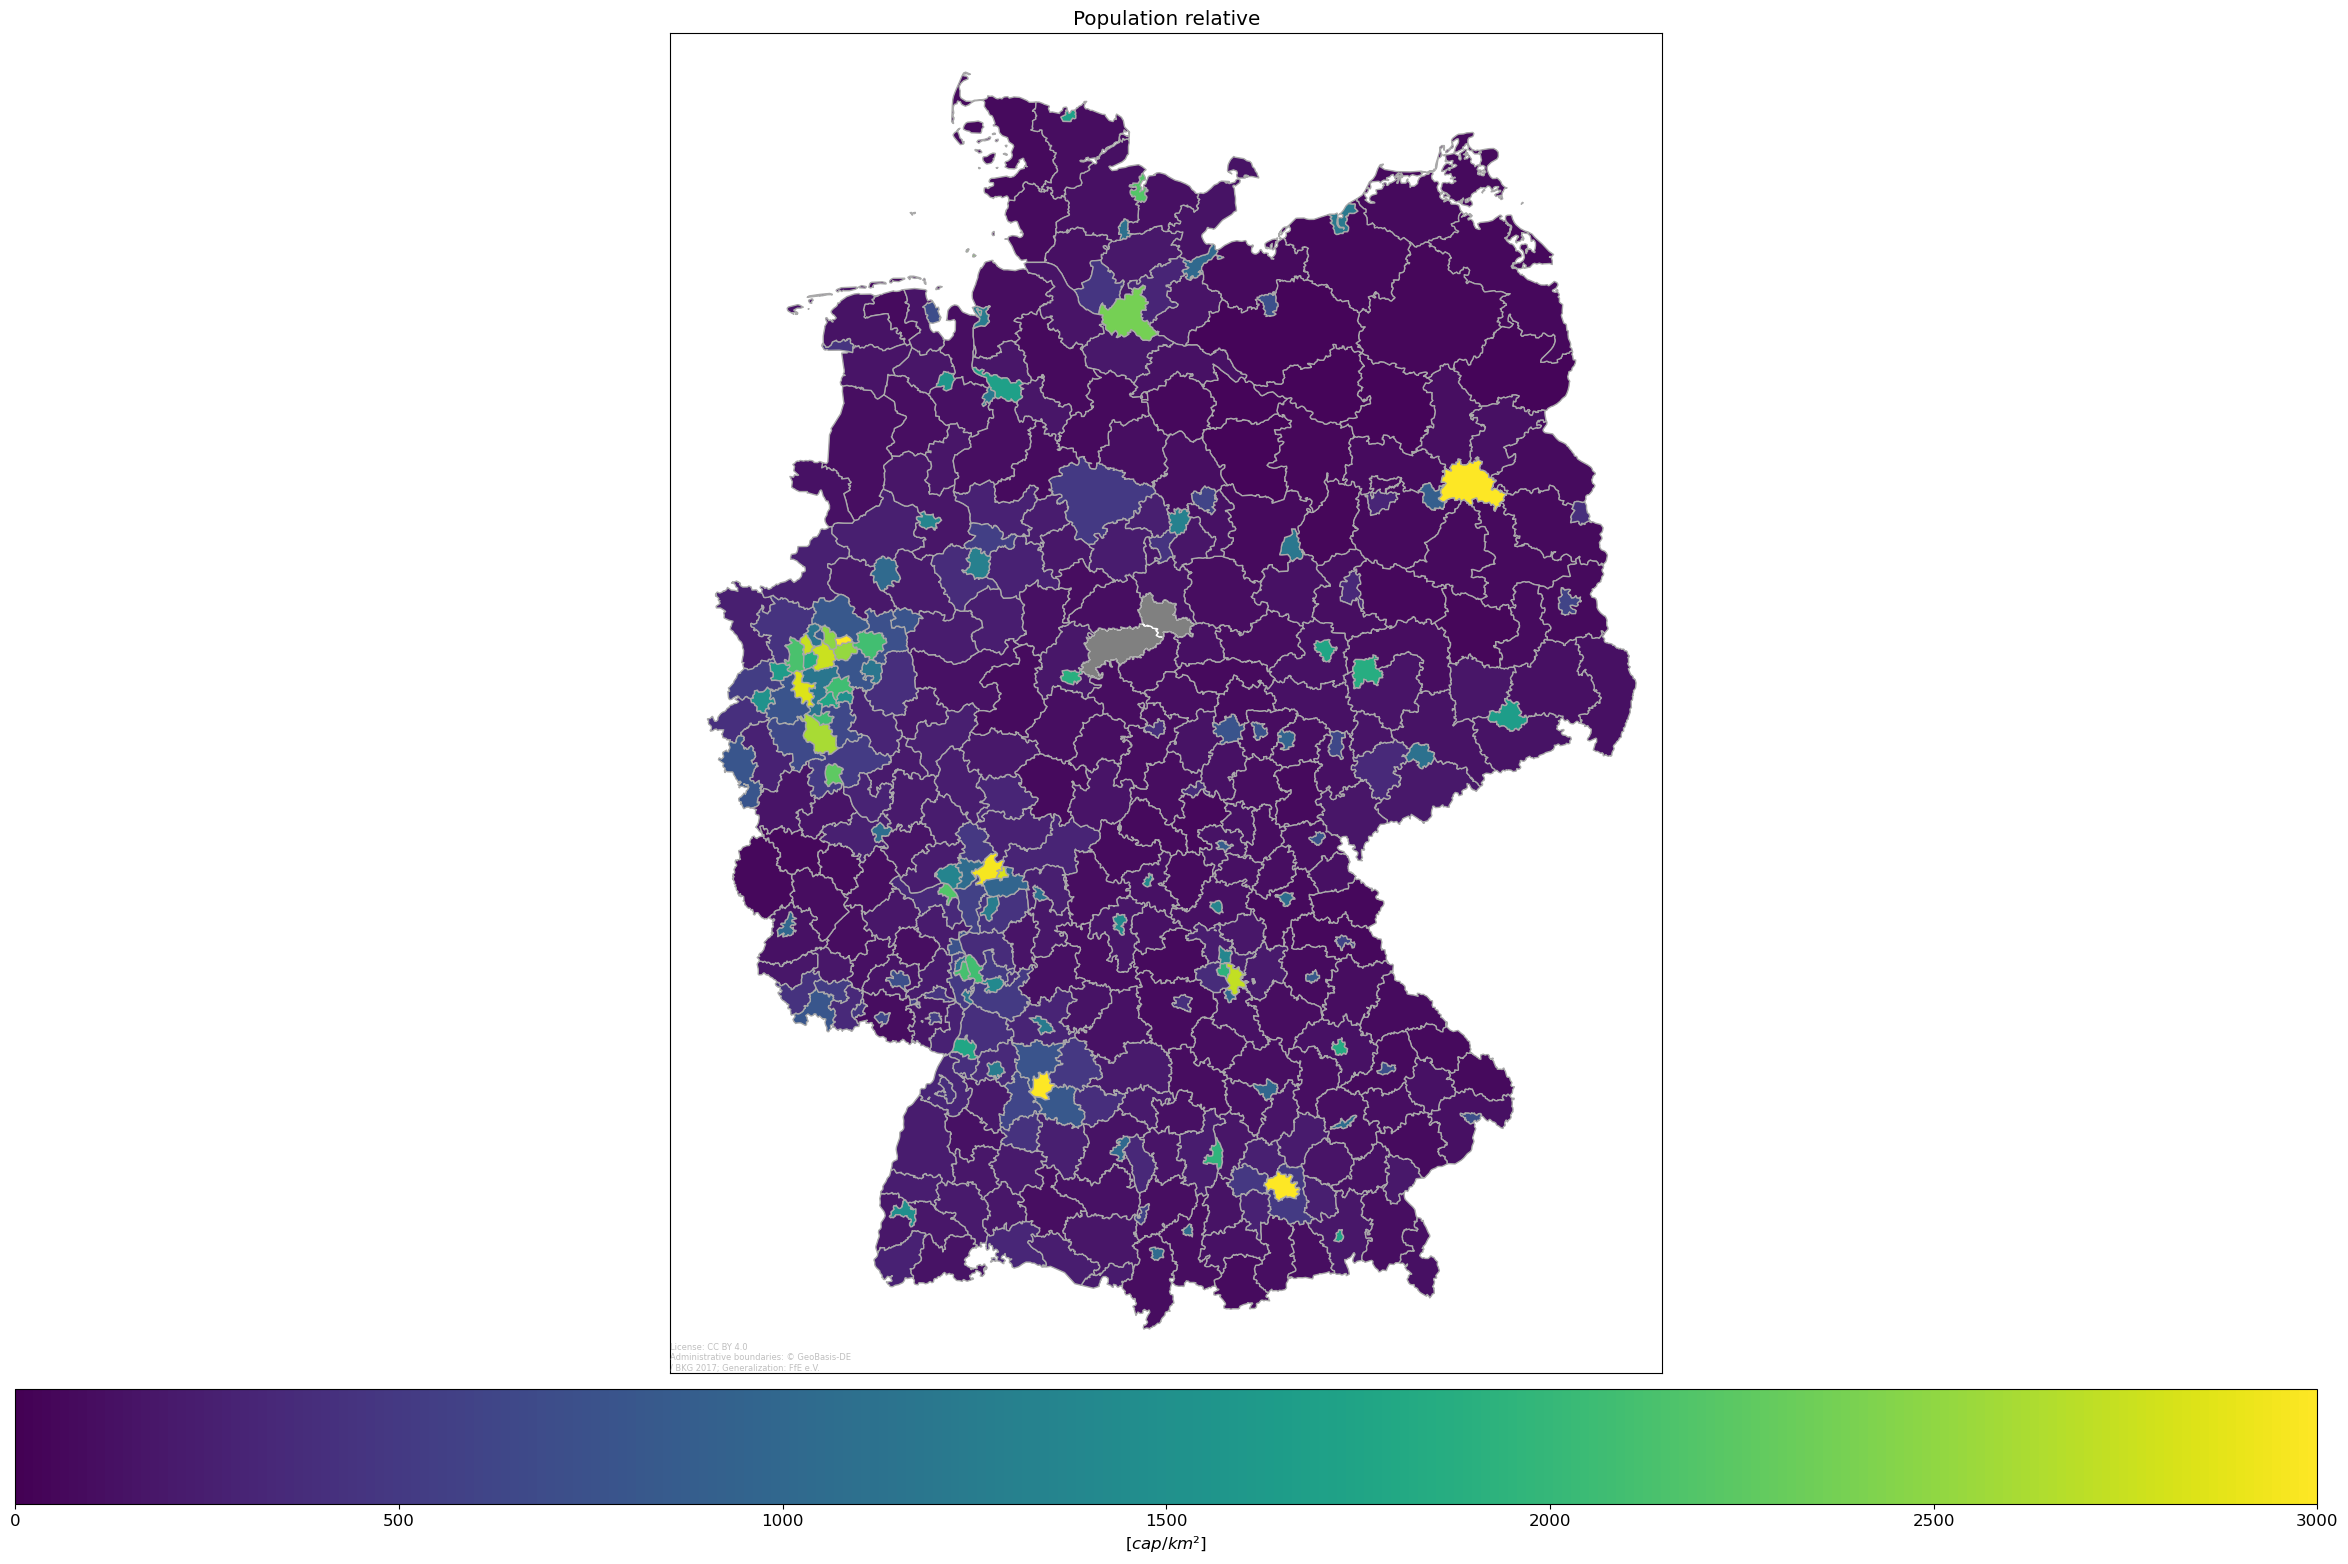

In [17]:
fig, ax = plot.choropleth_map(
    df_pop,
    relative=True,
    unit="cap",
    axtitle="Population relative",
    interval=(0, 3000),
    shape_source_api=False,
)

Now let's plot the households on a map:

2025-09-25 13:38:27 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:27 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:27 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


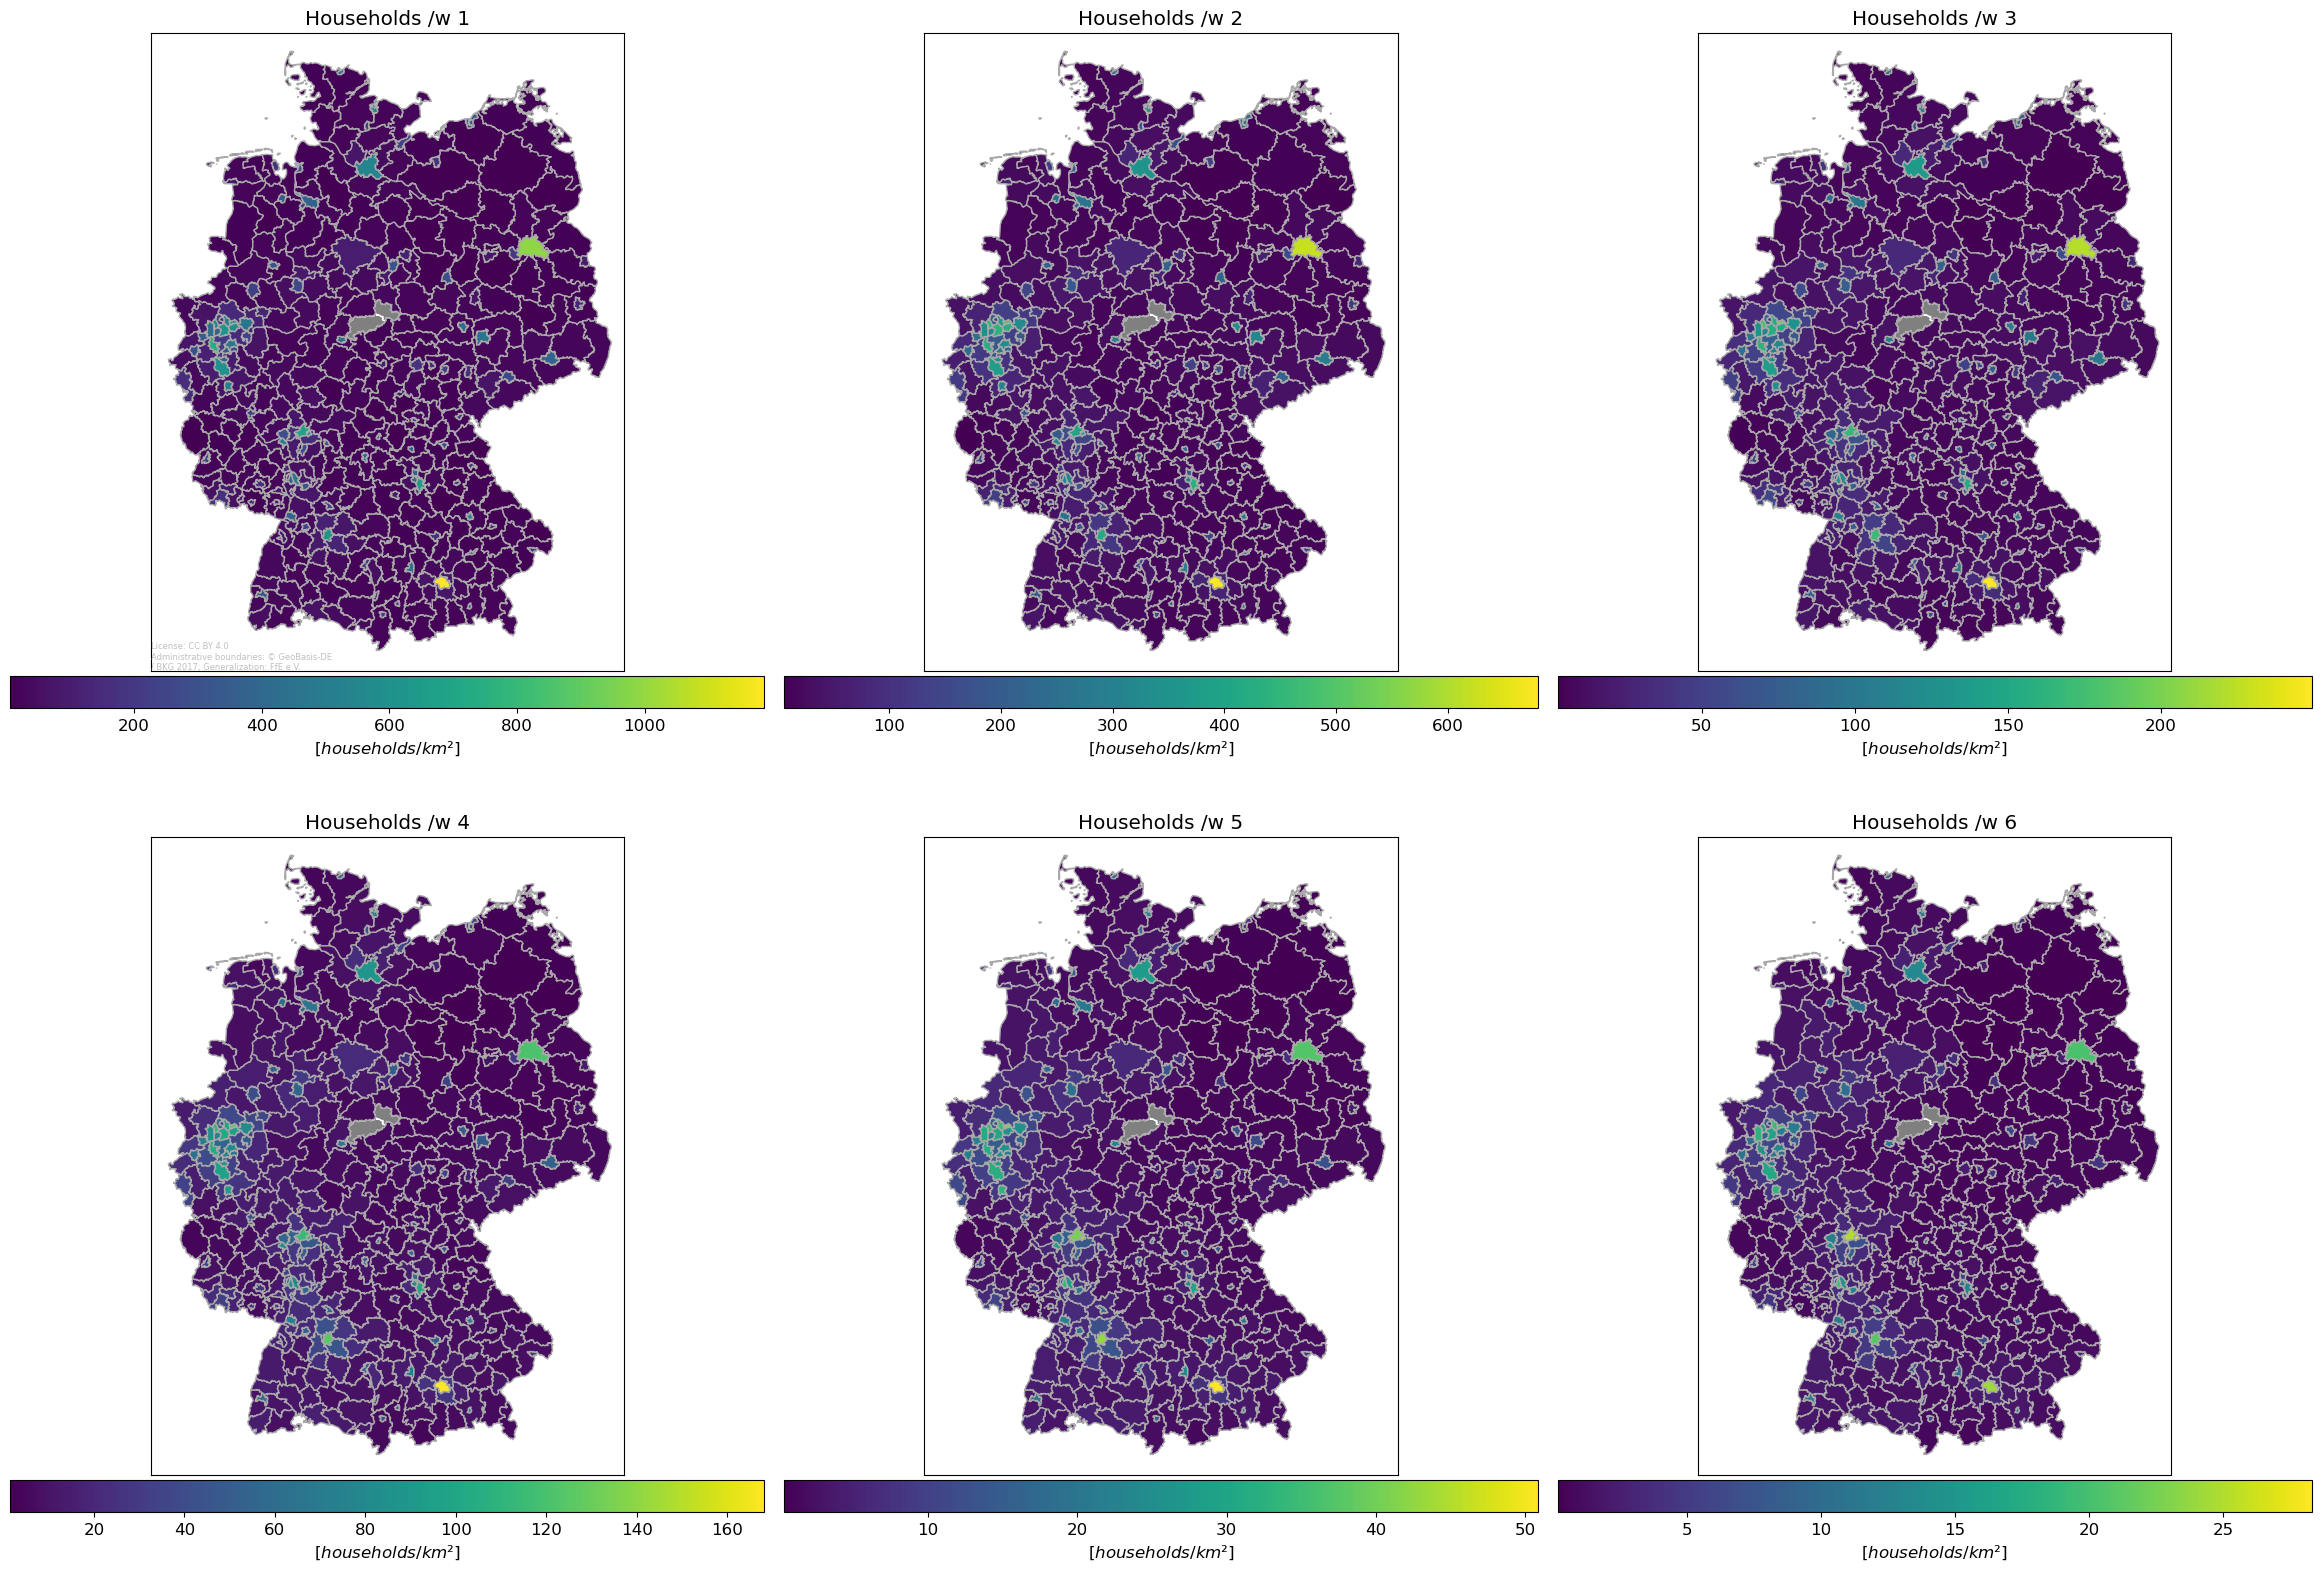

In [18]:
fig, ax = plot.choropleth_map(
    df_HH,
    relative=True,
    unit="households",
    axtitle="Households /w",
    colorbar_each_subplot=True,
    add_percentages=False,
    shape_source_api=False,
)

As you can see, the framework recognizes automatically that this dataset contains several data columns and creates a subplot for each column.
Still, it might be that you are not interested in the distribution of each household size, but the sum of all, e.g. to compare if the distribution of households corresponds to the distribution of the population. Let's do this:

2025-09-25 13:38:33 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:33 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:33 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


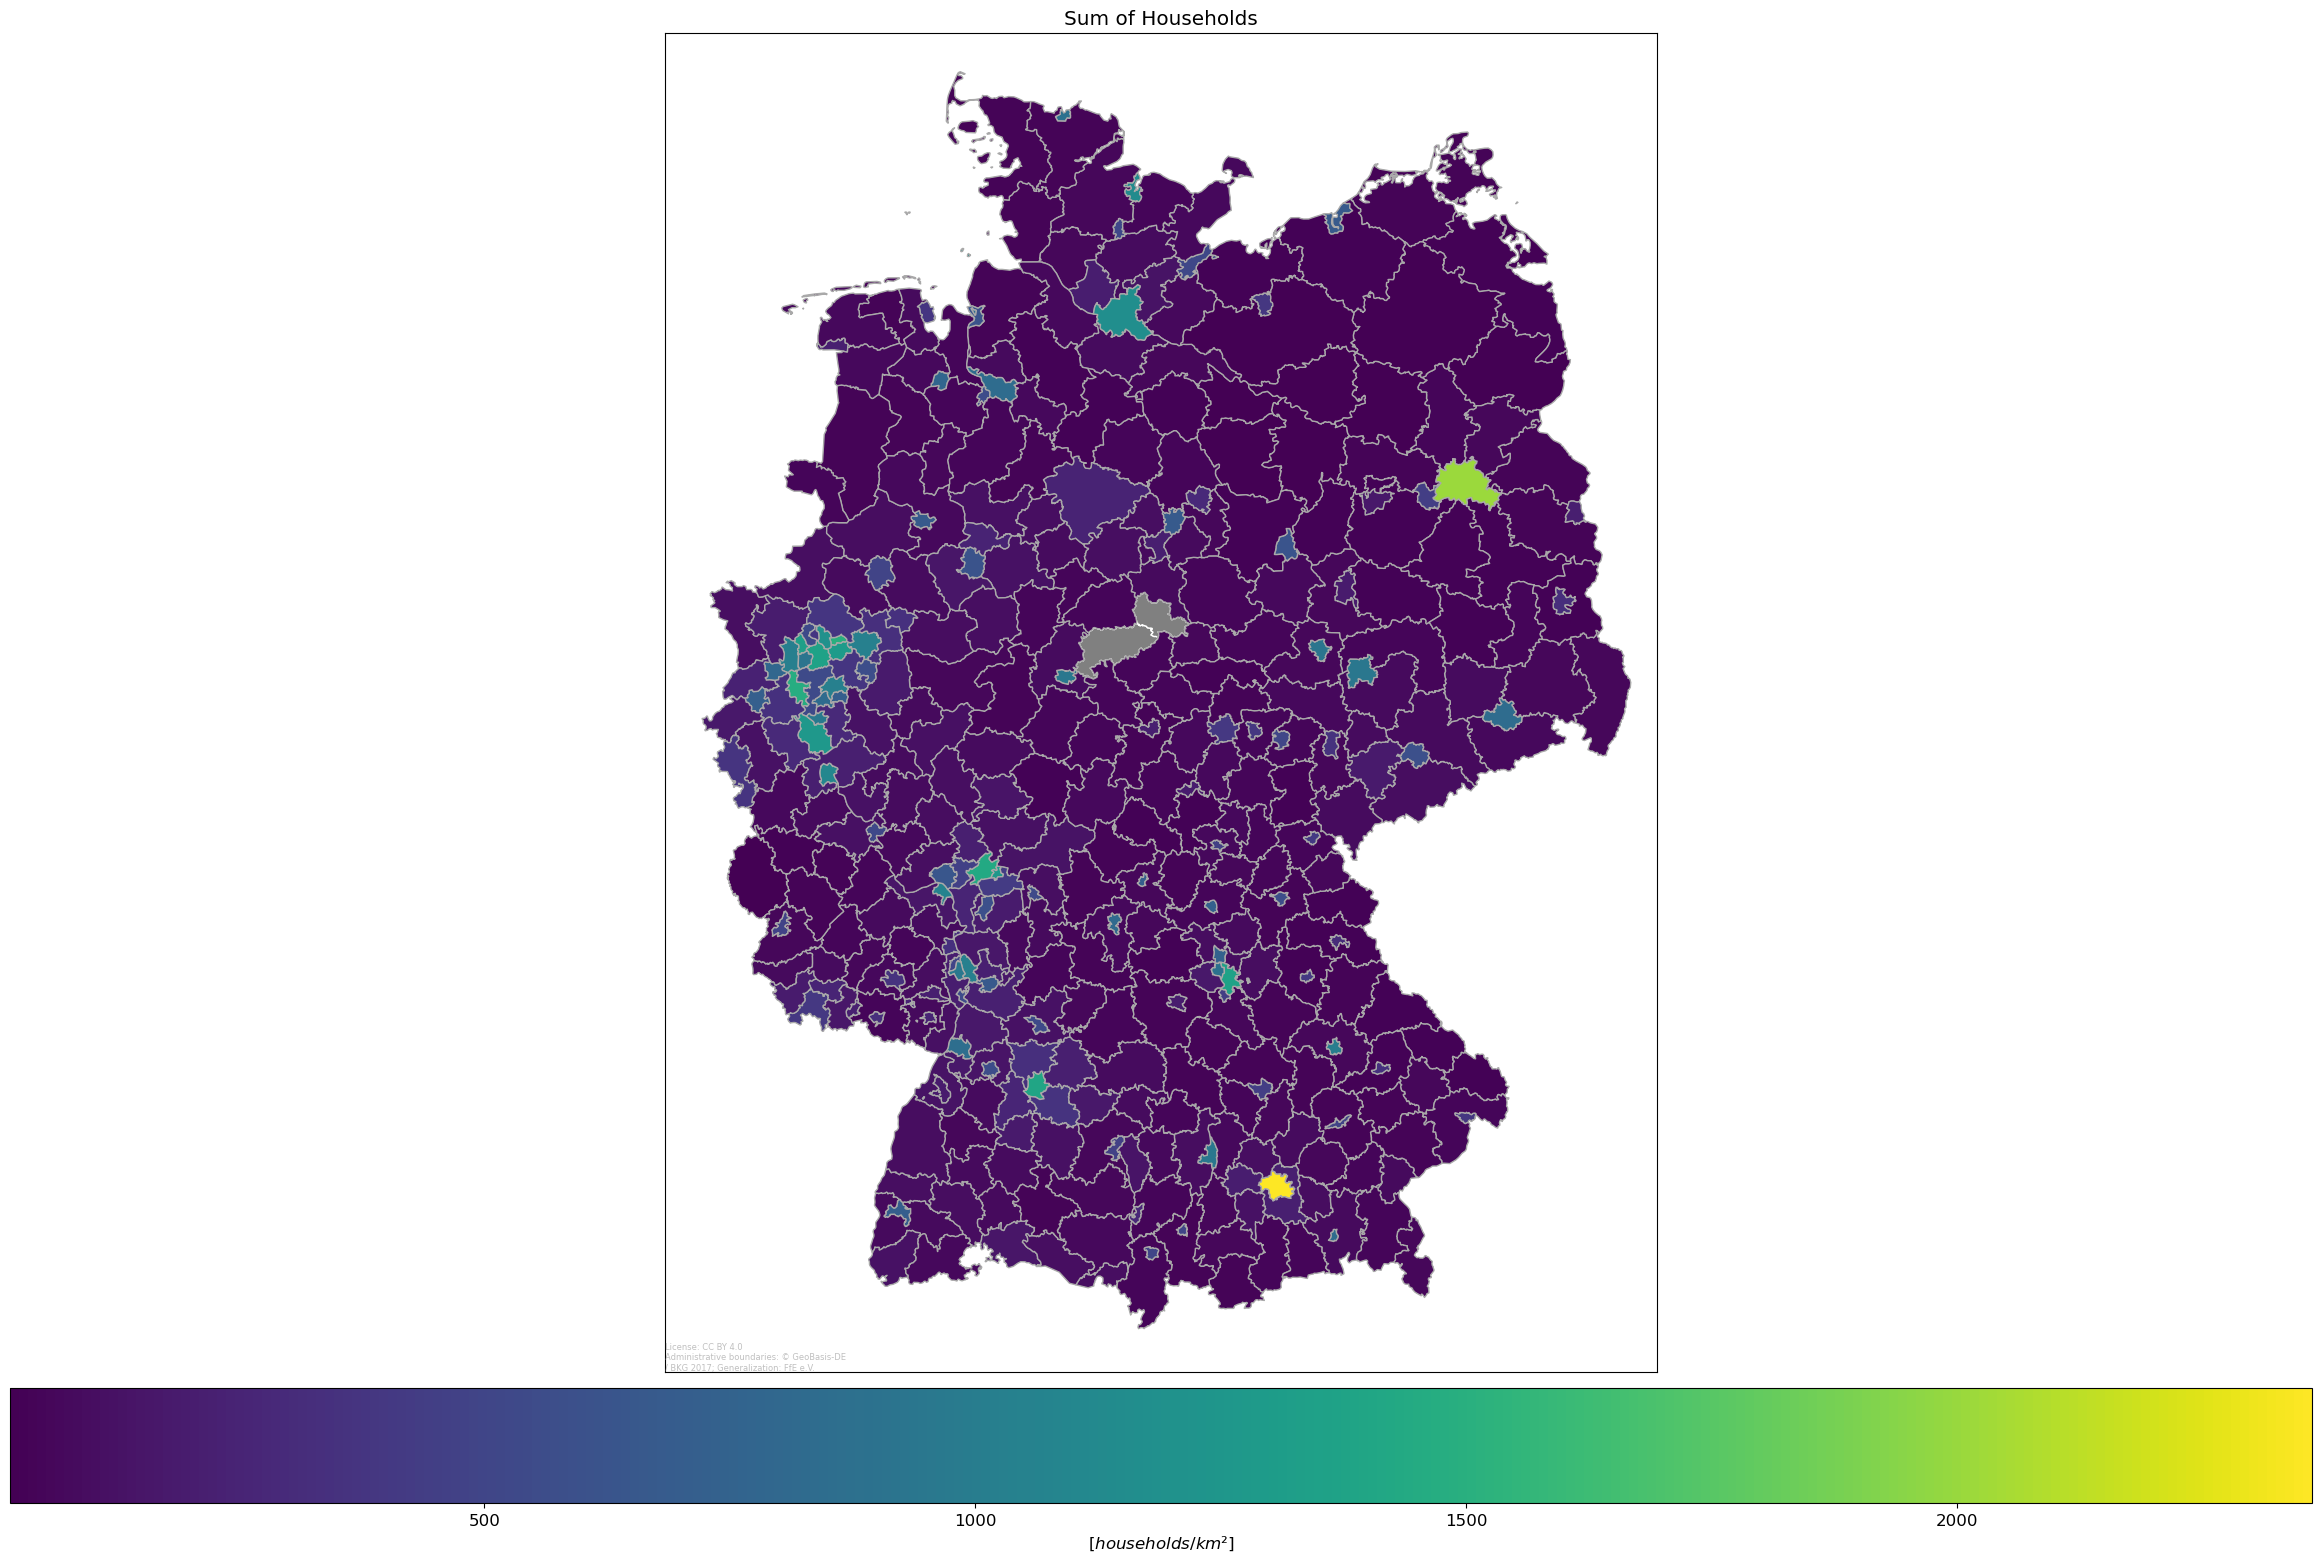

In [19]:
fig, ax = plot.choropleth_map(
    df_HH.sum(axis=1),
    relative=True,
    unit="households",
    axtitle="Sum of Households",
    shape_source_api=False,
)

So what about the living space distribution. Is it comparable to the households?

2025-09-25 13:38:33 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:33 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:33 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


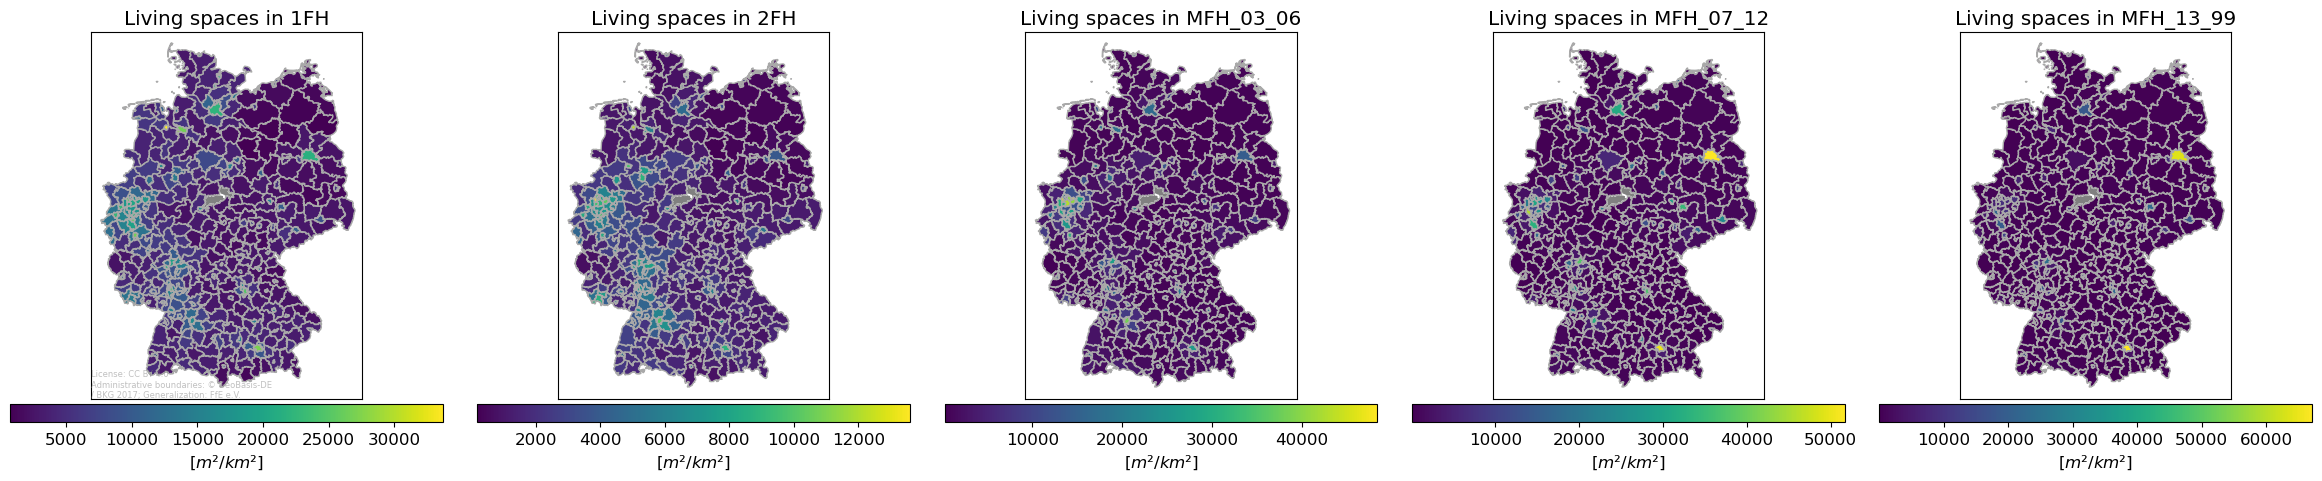

In [20]:
fig, ax = plot.choropleth_map(
    df_ls,
    relative=True,
    unit="m²",
    axtitle="Living spaces in",
    colorbar_each_subplot=True,
    shape_source_api=False,
)

Now let's have a look at the **income distribution**:

In [21]:
df_inc = data.income()
df_inc.head()

2025-09-25 13:38:37 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=45&year=2015&internal_id_1=2 (attempt 1/6)


2025-09-25 13:38:38 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 13:38:38 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


nuts3
DE111    24672.0
DE112    24100.0
DE113    24441.0
DE114    23455.0
DE115    24671.0
Name: value, dtype: float64

2025-09-25 13:38:38 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:38 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:38 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


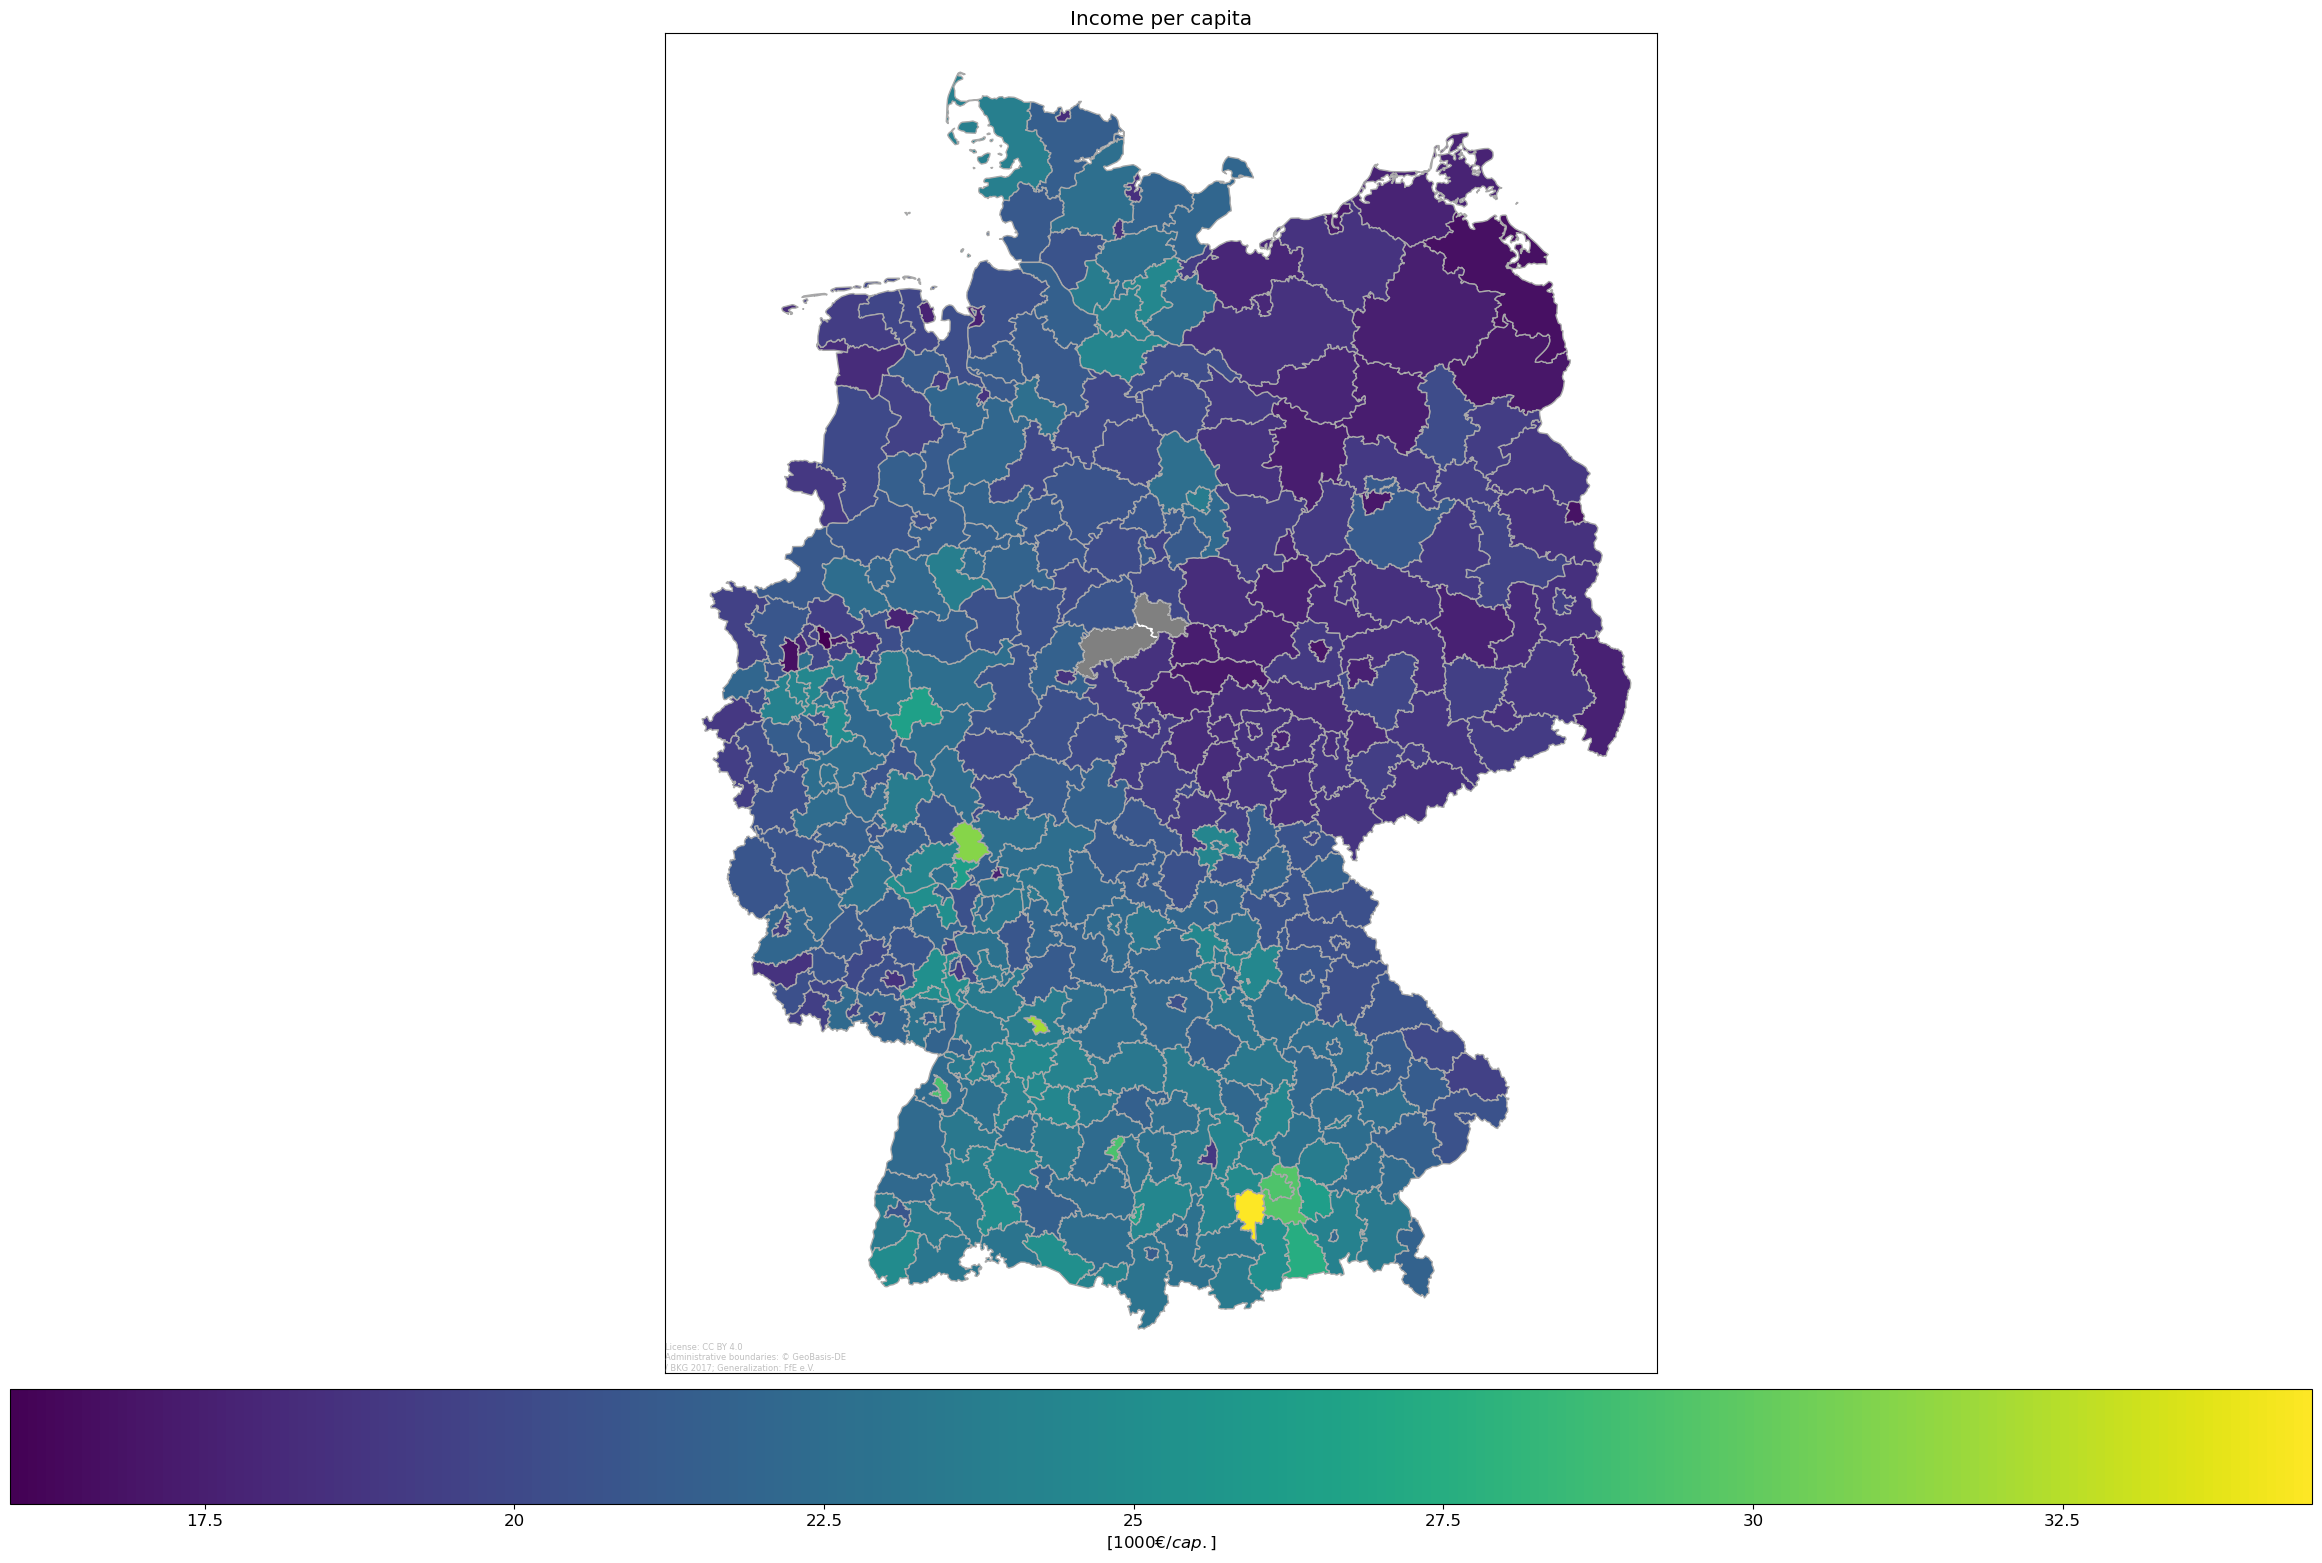

In [22]:
fig, ax = plot.choropleth_map(
    df_inc / 1e3,
    relative=False,
    unit="1000 €/cap.",
    axtitle="Income per capita",
    shape_source_api=False,
)

Now save this figure e.g. as PDF file:

In [23]:
fig.savefig(config.data_out("income_distribution.pdf"), bbox_inches="tight")

By the way, it is always possible to change the underlying colormap:

2025-09-25 13:38:39 disaggregator.plot: WARNING  Indices not common to both dataframes: {'DE915', 'DE91C', 'DE919'}
2025-09-25 13:38:39 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}
2025-09-25 13:38:39 disaggregator.plot: WARNING  Indices in df but NOT in shapefile: {'DE91C'}


Using NUTS 2013 data for base year 2015
Using existing NUTS shapefile.
data/NUTS_RG_01M_2013_4326_LEVL_3.shp
Loaded shapefile with 1480 features
Filtered to 402 German NUTS regions
Set NUTS_ID as index


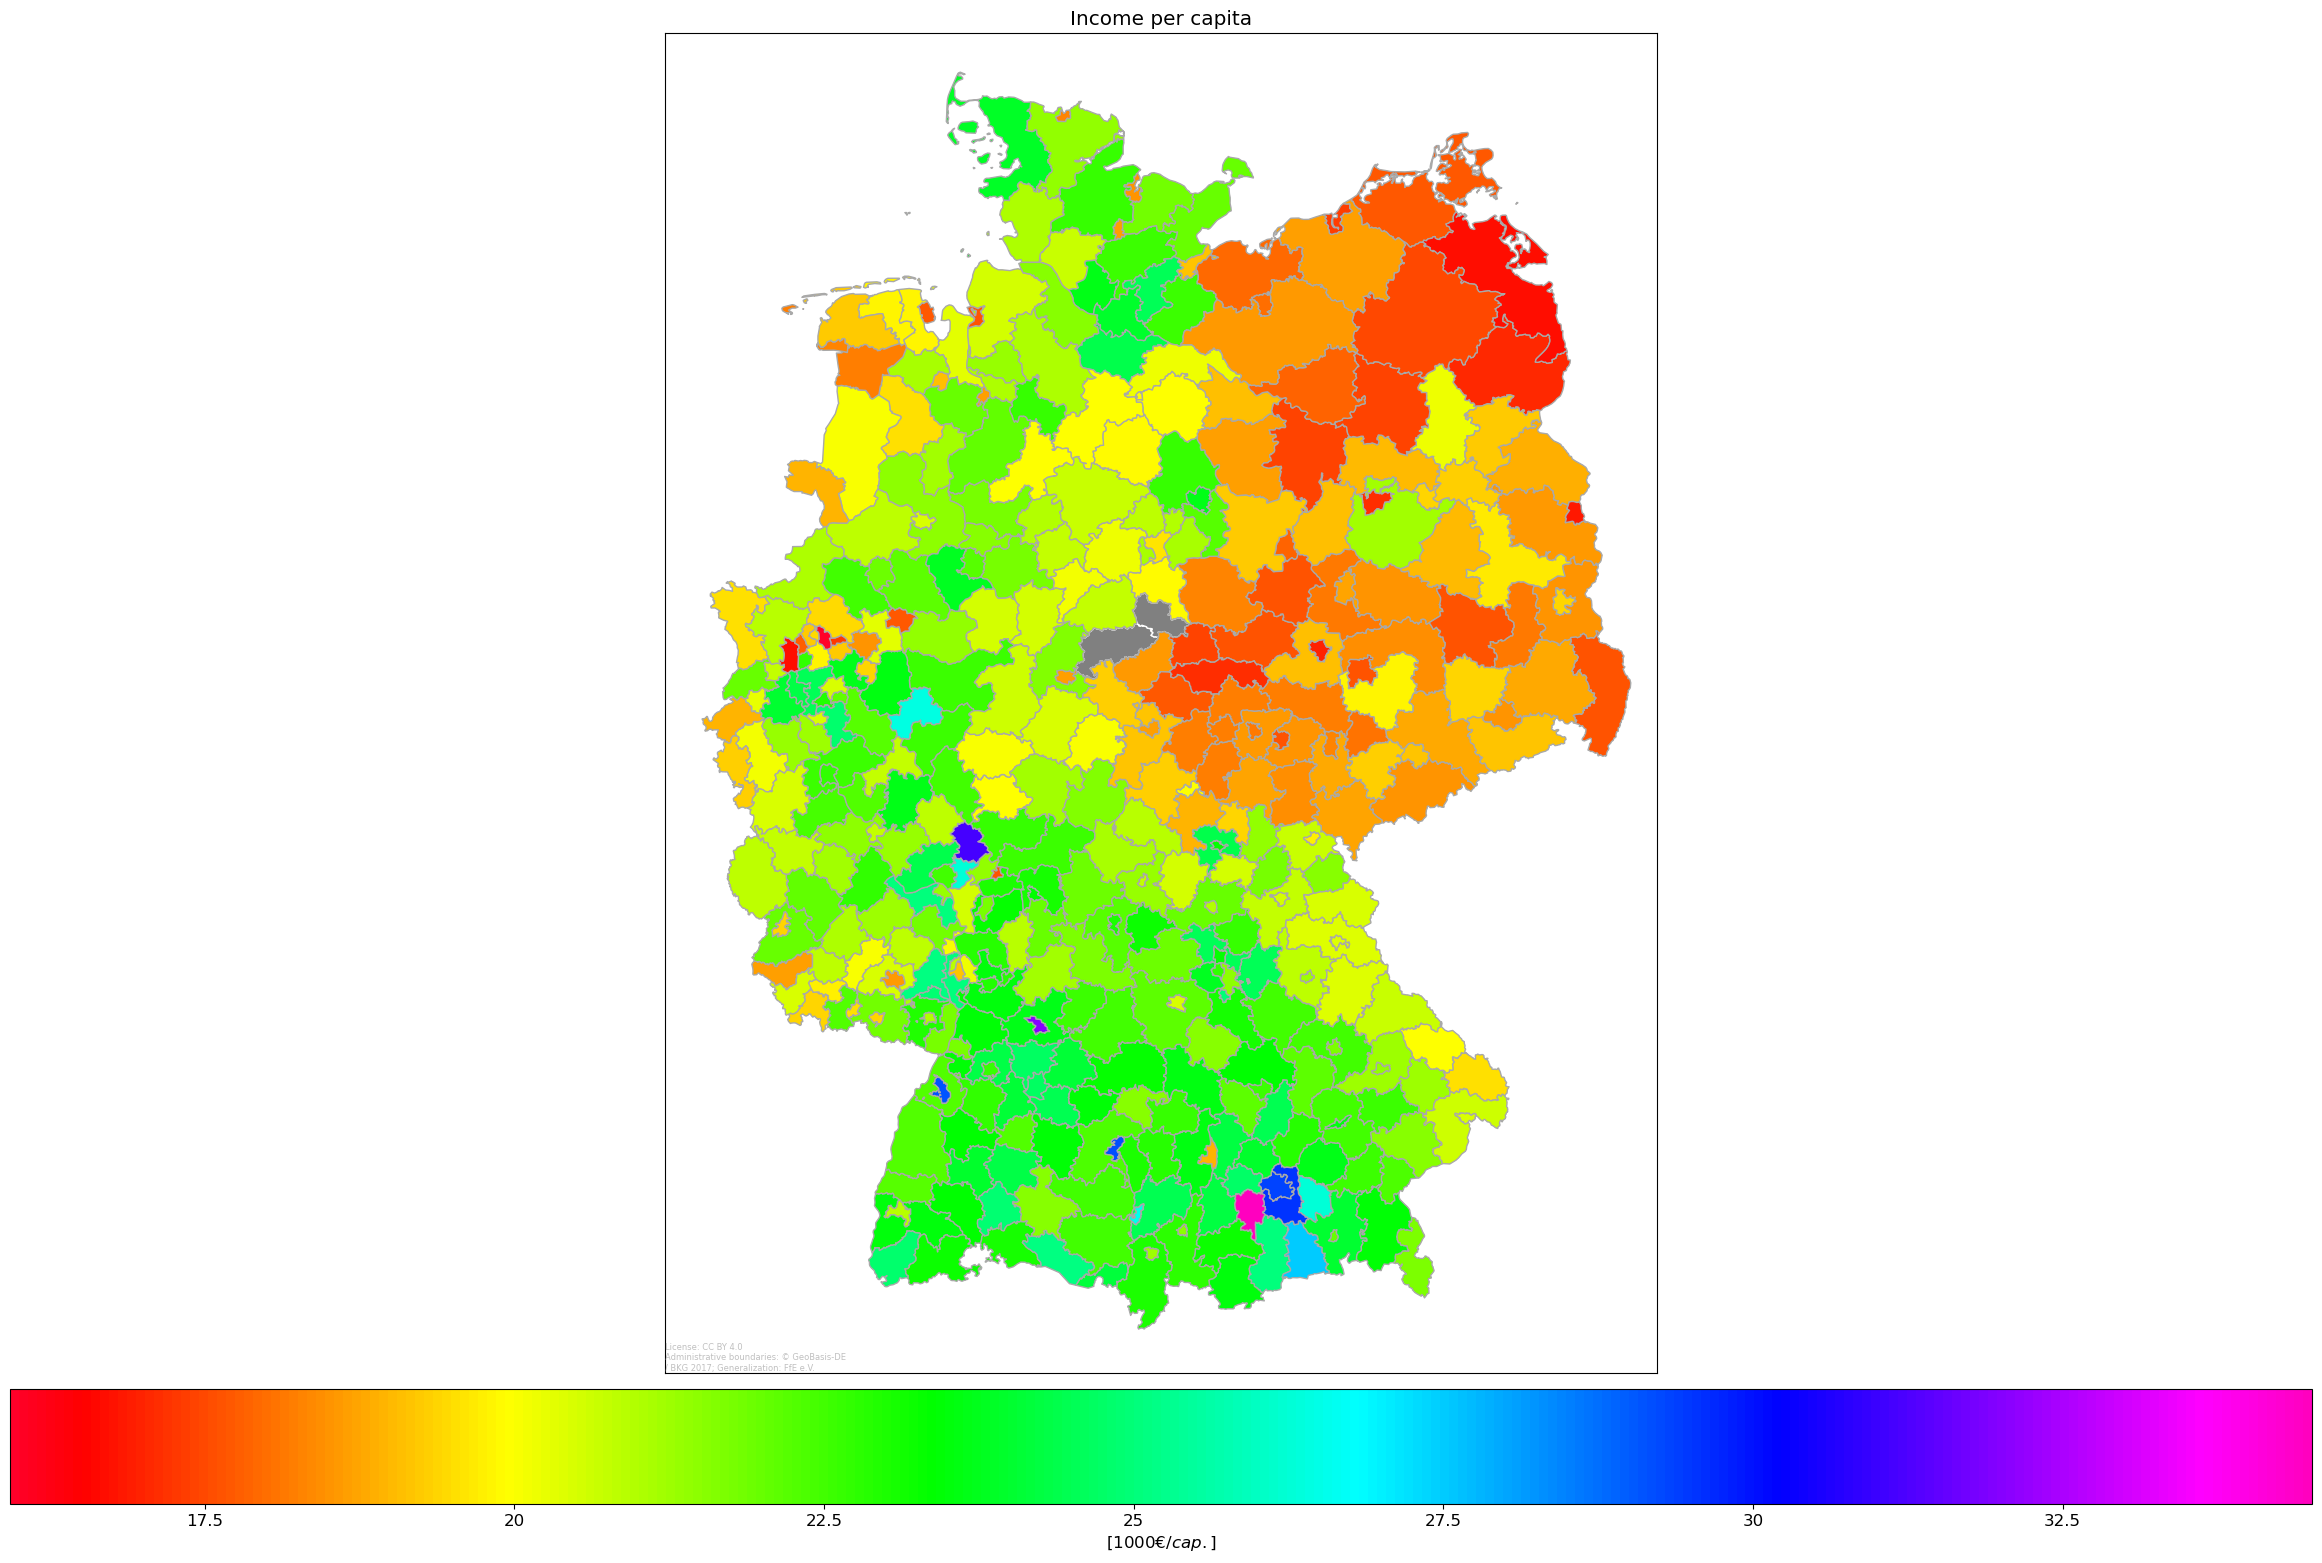

In [24]:
fig, ax = plot.choropleth_map(
    df_inc / 1e3,
    relative=False,
    unit="1000 €/cap.",
    axtitle="Income per capita",
    cmap="gist_rainbow",
    shape_source_api=False,
)